In [1]:
import tensorflow as tf
from tensorflow import keras 
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dense
import matplotlib.pyplot as plt
import random
import numpy as np

In [2]:
cifar=tf.keras.datasets.cifar10
(xtrain,ytrain),(xtest,ytest)=cifar.load_data()
print('x train shape : ',xtrain.shape)
print('x test shape : ',xtest.shape)
print('y train shape : ',ytrain.shape)
print('y test shape : ',ytest.shape)

x train shape :  (50000, 32, 32, 3)
x test shape :  (10000, 32, 32, 3)
y train shape :  (50000, 1)
y test shape :  (10000, 1)


In [3]:
xtrain=xtrain.astype('float32')
xtest=xtest.astype('float32')

xtrain=xtrain/255
xtest=xtest/255



In [7]:
model=Sequential([
    keras.layers.Flatten(input_shape=(32, 32, 3)),
    #keras.layers.Dense(2048,activation='relu'),
    #keras.layers.Dense(512,activation='relu'),
    keras.layers.Dense(256,activation='relu'),
   # keras.layers.Dense(128,activation='relu'),
    #keras.layers.Dense(32,activation='relu'),
    keras.layers.Dense(16,activation='relu'),
    keras.layers.Dense(10,activation='softmax')
])

model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 3072)              0         
                                                                 
 dense_7 (Dense)             (None, 256)               786688    
                                                                 
 dense_8 (Dense)             (None, 16)                4112      
                                                                 
 dense_9 (Dense)             (None, 10)                170       
                                                                 
Total params: 790970 (3.02 MB)
Trainable params: 790970 (3.02 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [9]:
model.compile(optimizer='sgd', loss='sparse_categorical_crossentropy',metrics=['accuracy'])
history=model.fit(xtrain,ytrain,validation_data=(xtest,ytest),epochs=20 )

Epoch 1/20
1563/1563 [==============================] - 6s 3ms/step - loss: 1.4097 - accuracy: 0.4899 - val_loss: 1.5124 - val_accuracy: 0.4570
Epoch 2/20
1563/1563 [==============================] - 5s 3ms/step - loss: 1.4027 - accuracy: 0.4928 - val_loss: 1.4914 - val_accuracy: 0.4718
Epoch 3/20
1563/1563 [==============================] - 5s 3ms/step - loss: 1.3999 - accuracy: 0.4968 - val_loss: 1.4954 - val_accuracy: 0.4689
Epoch 4/20
1563/1563 [==============================] - 5s 3ms/step - loss: 1.3998 - accuracy: 0.4953 - val_loss: 1.4942 - val_accuracy: 0.4691
Epoch 5/20
1563/1563 [==============================] - 5s 3ms/step - loss: 1.3974 - accuracy: 0.4974 - val_loss: 1.5095 - val_accuracy: 0.4660
Epoch 6/20
1563/1563 [==============================] - 5s 3ms/step - loss: 1.3961 - accuracy: 0.4967 - val_loss: 1.5060 - val_accuracy: 0.4685
Epoch 7/20
1563/1563 [==============================] - 5s 3ms/step - loss: 1.3962 - accuracy: 0.4964 - val_loss: 1.4959 - val_accuracy:

In [8]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy',metrics=['accuracy'])
history=model.fit(xtrain,ytrain,validation_data=(xtest,ytest),epochs=20 )

Epoch 1/20
1563/1563 [==============================] - 12s 8ms/step - loss: 2.1446 - accuracy: 0.1723 - val_loss: 2.0773 - val_accuracy: 0.1884
Epoch 2/20
1563/1563 [==============================] - 14s 9ms/step - loss: 2.0562 - accuracy: 0.1899 - val_loss: 2.0272 - val_accuracy: 0.1919
Epoch 3/20
1563/1563 [==============================] - 15s 9ms/step - loss: 2.0081 - accuracy: 0.2046 - val_loss: 1.9345 - val_accuracy: 0.2625
Epoch 4/20
1563/1563 [==============================] - 13s 8ms/step - loss: 1.8693 - accuracy: 0.2965 - val_loss: 1.8405 - val_accuracy: 0.3054
Epoch 5/20
1563/1563 [==============================] - 15s 10ms/step - loss: 1.7624 - accuracy: 0.3555 - val_loss: 1.7037 - val_accuracy: 0.3806
Epoch 6/20
1563/1563 [==============================] - 15s 10ms/step - loss: 1.6922 - accuracy: 0.3863 - val_loss: 1.7072 - val_accuracy: 0.3787
Epoch 7/20
1563/1563 [==============================] - 16s 10ms/step - loss: 1.6557 - accuracy: 0.4003 - val_loss: 1.6610 - val

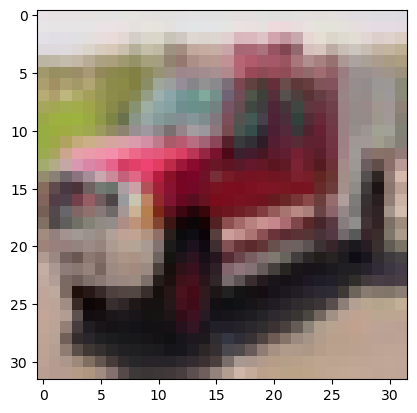

313/313 [==============================] - 2s 7ms/step
Predicted value: 9


In [14]:
n=random.randint(0,9999)
plt.imshow(xtest[n])
plt.show()
predicted_value=model.predict(xtest)

plt.show()
print('Predicted value:',np.argmax(predicted_value[n]))
